ニューロンは動物の神経系を構成する細胞の1つで、神経系の働きはニューロンの電気的活動によって担われている。静止時のニューロンの細胞内電位は外側に比べて60 mV ないし70 mV 程度低く、この細胞内外の電位差を膜電位という。この静止膜電位は細胞内と細胞外でイオン濃度に差があることによって生じている。イオンは細胞膜上に多数存在するイオンチャネルと呼ばれる特別なタンパク質を通ってニューロンを出入りする。活動電位は $Na^+$ と $K^+$ の移動によって発生し、この発生メカニズムは Hodgkin-Huxley モデルによって􏰄4変数の常微分方程式で記述される。細胞膜はコンデンサーとしての働きがあり、$C$ はその容量を表す。$I_{Na}$, $I_K$ は電位依存性 $Na^+$ チャネル全体(以下$Na$コンダクタンス)と電位依存性 $K^+$ チャネル全体(以下$K$コンダクタンス)を流れる電流を表し、$I_L$ はその他のイオン電流(リーク電流と呼ぶ)を表している。$I_m$ は細胞内に注入する電流の大きさに対応している。また、透過性はその最大値とチャネルの開閉状態を表す変数 $m, h, n$ との積で表す。$m, h, n$ は無次元で、0から1の間に正規化されている。以上のことを式にまとめると、 \
\begin{align*}
\frac{dV}{dt} &= \frac{1}{C}(I_m + I_{Na} + I_k + I_l) \\
I_{Na} &= g_{Na} m^3h(E_{Na} - V) \\
I_K &= g_K n^4 (E_K - V) \\
I_L &= g_L (E_L - V)
\end{align*}
となる。変数$m$は膜電位の上昇に伴って$Na$コンダクタンスの透過性が上昇する(􏰟􏰠􏰯$Na^+$チャネルが開く)プロセス(􏰩活性化)に、変数$h$はコンダクタンスの透過性が再び減少する(􏰟􏰠􏰯$K^+$チャネルが再び閉じる)プロセス(不活性化)に対応している。$m$と同様に、変数$n$は膜電位の上昇に伴って$K$コンダクタンスの透過性が上昇する($K^+$チャネルが開く)プロセスに対応している。そして$m, h, n$はそれぞれ以下のような1次の微分方程式で記述される。 \
\begin{align*}
\frac{dm}{dt} &= \alpha_m(V)(1 - m) - \beta_m(V)m \\
\frac{dh}{dt} &= \alpha_h(V)(1 - h) - \beta_h(V)h \\
\frac{dn}{dt} &= \alpha_n(V)(1 - n) - \beta_n(V)n \\
\alpha_m &= \frac{0.1(V + 40)}{1 - \exp(-(V + 40)/10)} \\
\beta_m &= 4\exp(-(V + 65)/18) \\
\alpha_h &= 0.07\exp(-(V + 65)/20) \\
\beta_h &= \frac{1}{1 + \exp(-(V + 35)/10)} \\
\alpha_n &= \frac{0.01(V + 55)}{1 - \exp(-(V + 55)/10)} \\
\beta_n &= 0.125\exp(-(V + 65)/80)
\end{align*}
定数は、
\begin{equation}
C = 1.0 \mu \mathrm{F/cm^2} \\
g_{Na} = 120 \mathrm{mS/cm^2}, E_{Na} = 55 \mathrm{mV} \\
g_K = 36 \mathrm{mS/cm^2}, E_K = -77 \mathrm{mV} \\
g_L = 0.3 \mathrm{mS/cm^2}, E_L = -54.387 \mathrm{mV}
\end{equation}
とした。このモデルを数値計算によって計算した結果は以下のようになる。

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math

def a_m(v):
    return 0.1*(v + 40)/(1 - math.exp(-(v + 40)/10))
    
def b_m(v):
    return 4*math.exp(-(v + 65)/18)
    
def a_h(v):
    return 0.07*math.exp(-(v + 65)/20)
    
def b_h(v):
    return 1/(1 + math.exp(-(v + 35)/10))
    
def a_n(v):
    return 0.01*(v + 55)/(1 - math.exp(-(v + 55)/10))
    
def b_n(v):
    return 0.125*math.exp(-(v + 65)/80)

#m, h, nのtに関しての微分
def dmdt(v, m):
    return a_m(v)*(1 - m) - b_m(v)*m

def dhdt(v, h):
    return a_h(v)*(1 - h) - b_h(v)*h

def dndt(v, n):
    return a_n(v)*(1 - n) - b_n(v)*n
    
#I_Na, I_K, I_L
def I_n(m, h, v):
    g_n = 120
    E_n = 55
    return g_n*m**3*h*(E_n - v)

def I_k(n, v):
    g_k = 36
    E_k = -77
    return g_k*n**4*(E_k - v)

def I_l(v):
    g_l = 0.3
    E_l = -54.387
    return g_l*(E_l - v)

#矩形波
def I_m(t):
    y = np.sin(t)
    I = 30*np.where(y > 0, 1, 0)
    return I

def dvdt(m, h, n, v, t):
    C = 1.0
    return 1/C*(I_m(t) + I_n(m, h, v) + I_k(n, v) + I_l(v))

#m, h, nの初期値を計算する
def m0(v):
    return a_m(v)/(a_m(v) + b_m(v))

def h0(v):
    return a_h(v)/(a_h(v) + b_h(v))

def n0(v):
    return a_n(v)/(a_n(v) + b_n(v))

#tを[0, 50]までの5000等分する
t_0 = 0
t_n = 50
dt = 0.01
t_list = np.arange(t_0, t_n, dt)

V_list = []
m_list = []
h_list = []
n_list = []
I_n_list = []
I_k_list = []
I_l_list = []
N = len(t_list)
t = 0
v = -70
m = m0(v)
h = h0(v)
n = n0(v)
V_list.append(v)
m_list.append(m)
h_list.append(h)
n_list.append(n)
I_n_list.append(I_n(m, h, v))
I_k_list.append(I_k(n, v))
I_l_list.append(I_l(v))

for i in range(1, N):
    m = m + dmdt(v, m)*dt
    h = h + dhdt(v, h)*dt
    n = n + dndt(v, n)*dt
    v = v + dvdt(m, h, n, v, t)*dt
    t = t + dt
    V_list.append(v)
    m_list.append(m)
    h_list.append(h)
    n_list.append(n)
    I_n_list.append(I_n(m, h, v))
    I_k_list.append(I_k(n, v))
    I_l_list.append(I_l(v))

Text(0.5, 1.0, 'Transition of electric potential')

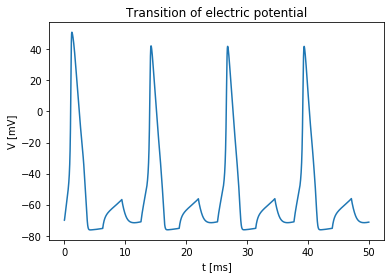

In [59]:
plt.plot(t_list, V_list)
plt.xlabel('t [ms]')
plt.ylabel('V [mV]')
plt.title('Transition of electric potential')

上のグラフは電位の変化の推移である。これを見ると電位の急激な上昇(スパイク)が見て取れる。

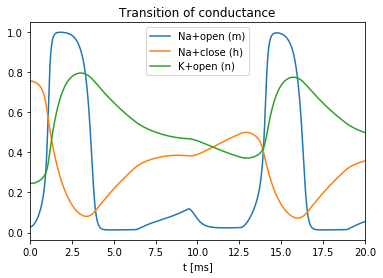

In [63]:
plt.plot(t_list, m_list, label = 'Na+open (m)')
plt.plot(t_list, h_list, label = 'Na+close (h)')
plt.plot(t_list, n_list, label = 'K+open (n)')
plt.xlim(0, 20)
plt.xlabel('t [ms]')
plt.title('Transition of conductance')
plt.legend()

$m, h, n$の推移を表したものが上である(xrange = [0, 20]となっていることに注意されたい)。$m$が急激に上昇するのに対して$h$は緩やかに上昇しているのがわかる。これは$Na^+$チャネルの開く過程が閉じる過程よりも速いということである。実際、$Na^+$チャネルの閉じる過程は開く過程の10分の1程度の速さである。

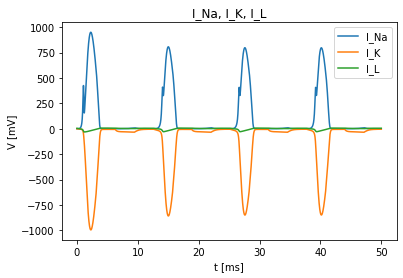

In [57]:
plt.plot(t_list, I_n_list, label = 'I_Na')
plt.plot(t_list, I_k_list, label = 'I_K')
plt.plot(t_list, I_l_list, label = 'I_L')
plt.xlabel('t [ms]')
plt.ylabel('V [mV]')
plt.title('I_Na, I_K, I_L')
plt.legend()

上が$I_{Na}, I_K, I_L$それぞれの電位の大きさである。

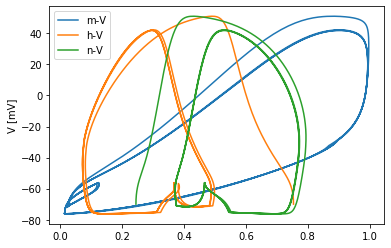

In [56]:
plt.plot(m_list, V_list, label = 'm-V')
plt.plot(h_list, V_list, label = 'h-V')
plt.plot(n_list, V_list, label = 'n-V')
plt.ylabel('V [mV]')
plt.legend()

上は$m, h, n$と$V$を平面にプロットしたものである。こう見ると$h$と$n$は全く逆の動きをなしていることがわかる。

参考文献

https://core.ac.uk/download/pdf/147691761.pdf \
https://bsd.neuroinf.jp/wiki/Hodgkin-Huxley方程式#Two-state_model:_.E5.9F.BA.E7.A4.8E.E7.9A.84.E3.81.AA.E8.80.83.E3.81.88.E6.96.B9 \
https://omedstu.jimdofree.com/2018/06/21/hodgkin-huxleyモデルをアニメーションで見る/ \
https://qiita.com/tagut_19/items/5b55f0fb3b9034127699 \
http://ceptree.hatenablog.com/entry/2017/03/30/050929